In [1]:
# standard libraries
import importlib
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy import linalg, stats, optimize
import time
import networkx as nx
import sys
sys.path.append('/Users/francescacrucinio/Documents/MD_LVM')

import md_lvm
importlib.reload(md_lvm)

<module 'md_lvm' from '/Users/francescacrucinio/Documents/MD_LVM/md_lvm.py'>

In [2]:
nodes = 100
pi = np.array([0.6, 0.4])
probs = np.array([[0.25, 0.1], [0.1, 0.2]])

In [3]:
# sizes = [int(nodes*p), int(nodes*(1-p))]
# probs = [[0.25, 0.1], [0.1, 0.2]]
# g = nx.stochastic_block_model(sizes, probs, seed=0)
# len(g)
# nx.draw(g)
# A = nx.adjacency_matrix(g)
# y = A.toarray()

In [4]:
def sbm_sample(pi, nu, nodes):
    # block allocation
    x = np.random.choice(np.arange(len(pi)), nodes, p=pi)
    # adjacency matrix 
    A = np.zeros((nodes, nodes))
    for i in range(nodes):
        A[i, np.delete(np.arange(nodes), i)] = np.random.binomial(1, p = probs[x[i], np.delete(x, i)], size = nodes-1)
    return A, x

In [5]:
y, res_z = sbm_sample(pi, probs, nodes)
# y = np.loadtxt("adj.txt")

In [6]:
th0 = np.array([0.5, 0.5, 0.5, 0.5])  # Initial parameter guess.
X0 = np.random.binomial(1, 0.5, nodes)+1  # Initial particle cloud.

In [7]:
Niter = 300
N = nodes
gamma = 0.01

In [8]:
theta, x, W = md_lvm.md_sbm_fast(y, gamma, Niter, N, th0, X0)

/Users/francescacrucinio/Documents/MD_LVM/md_lvm.py:242: RuntimeWarning: invalid value encountered in log
  prior[i] = np.log(theta[0])
/Users/francescacrucinio/Documents/MD_LVM/md_lvm.py:242: RuntimeWarning: invalid value encountered in log
  prior[i] = np.log(theta[0])


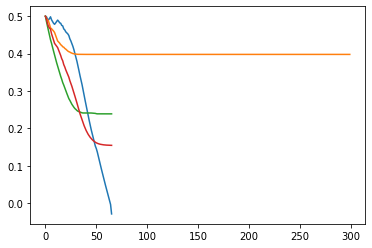

In [9]:
plt.plot(theta)

In [10]:
theta

array([[0.5       , 0.5       , 0.5       , 0.5       ],
       [0.4988    , 0.49408   , 0.486208  , 0.492496  ],
       [0.49284797, 0.49112794, 0.47422891, 0.48100715],
       ...,
       [       nan, 0.39782831,        nan,        nan],
       [       nan, 0.39782831,        nan,        nan],
       [       nan, 0.39782831,        nan,        nan]])